# Parte 2 del trabajo final: Indicadores de desarrollo global

## Fuerza laboral femenina en el Perú

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.stats import norm
from scipy import stats

### 1. Obtener el porcentaje de fuerza laboral femenina para Perú

In [7]:
female_lf = pd.read_csv('desarrollo_global.csv')

peru_flf = female_lf.loc[((female_lf['Country Name'] == 'Peru') & (female_lf['Series Name'] == 'Labor force, female (% of total labor force)'))]
peru_flf = peru_flf[peru_flf.columns[~peru_flf.columns.isin(['Country Name', 'Country Code', 'Series Name','Series Code'])]]

peru_flf

,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
929,..,..,..,..,..,..,..,..,..,..,...,45.8711092036968,45.804310150231,45.4276000599438,45.7818223870905,45.9158254902167,46.1114156983427,46.1284202883485,44.2865347211395,45.975899260784,46.7458159089724


Luego de filtrar los datos, se edita el nombre de las columnas para que solo figure el año

In [11]:
yrs = list(peru_flf.columns)

for i in range(len(yrs)):
    yrs[i] = yrs[i][:4] 
    
print(yrs)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


Ahora se va a cambiar el nombre de las columnas con la lista generada anteriormente, reemplazar los missing values con numpy para que sean de tipo float, y convertir todos los valores del data frame a float.

In [14]:
peru_flf.columns = yrs
peru_flf.replace('..', np.nan, inplace=True)
peru_flf = peru_flf.astype(float)
peru_flf

/var/folders/v5/719lrkzs4hj7f4f4mwq95c1h0000gn/T/ipykernel_29917/2994362164.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  peru_flf.replace('..', np.nan, inplace=True)


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.871109,45.80431,45.4276,45.781822,45.915825,46.111416,46.12842,44.286535,45.975899,46.745816


Para facilitar el merge, se va a transponer el data frame generado.

In [17]:
tperu_flf = peru_flf.transpose()
tperu_flf.columns = ['fl_peru']
tperu_flf

,fl_peru
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN
...,...
2018,46.111416
2019,46.128420
2020,44.286535
2021,45.975899


### 2. Obtener el porcentaje de fuerza laboral femenina promedio para Latinoamérica y el Caribe

Para filtrar los datos, se empleará una lista con los países que el Banco Mundial registra como parte de la región Latinoamérica y el Caribe. Seguidamente, se repiten los mismos pasos que para el caso de Perú.

In [24]:
lac = [
    "Antigua and Barbuda", "Argentina", "Aruba", "Bahamas, The", "Barbados", "Belize", "Bolivia", "Brazil", 
    "British Virgin Islands", "Cayman Islands", "Chile", "Colombia", "Costa Rica", "Cuba", "Curacao", 
    "Dominica", "Dominican Republic", "Ecuador", "El Salvador", "Grenada", "Guatemala", "Guyana", "Haiti", 
    "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Paraguay", "Peru", "Puerto Rico", 
    "Sint Maarten (Dutch part)", "St. Kitts and Nevis", "St. Lucia", "St. Martin (French part)", 
    "St. Vincent and the Grenadines", "Suriname", "Trinidad and Tobago", "Turks and Caicos Islands", 
    "Uruguay", "Venezuela, RB", "Virgin Islands (U.S.)"
]

lac_flf = female_lf.loc[((female_lf['Country Name'].isin(lac)) & (female_lf['Series Name'] == 'Labor force, female (% of total labor force)'))]
lac_flf = lac_flf[lac_flf.columns[~lac_flf.columns.isin(['Country Name', 'Country Code', 'Series Name','Series Code'])]]
lac_flf.columns = yrs
lac_flf.replace('..', np.nan, inplace=True)
lac_flf = lac_flf.astype(float)
lac_flf

/var/folders/v5/719lrkzs4hj7f4f4mwq95c1h0000gn/T/ipykernel_29917/3123933911.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lac_flf.replace('..', np.nan, inplace=True)


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.672927,40.823464,41.025023,41.233085,41.441271,42.146220,42.376056,42.393834,42.533911,43.081417
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.458684,47.519201,47.526261,47.602709,47.762798,47.913278,47.962261,47.953544,48.142620,48.389667
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.225548,50.043936,50.285631,49.967381,49.637676,49.370374,49.973231,49.831683,50.011675,50.095340
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.114276,37.312991,37.771035,38.241145,37.976908,38.067705,38.051644,37.953970,38.234131,38.516959
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.365483,42.830940,40.699916,42.285105,43.117337,44.331710,43.030014,42.683232,42.461035,42.843474
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.123945,42.217141,42.553791,42.705732,43.230434,43.432423,43.736217,42.605281,43.117615,43.579161
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para facilitar el merge y la comparación, se transpone el data frame y se calcula el promedio para la región.

In [27]:
tlac_flf = lac_flf.transpose()

tlac_flf['fl_lac'] = tlac_flf.mean(axis=1)

tlac_flf = tlac_flf[tlac_flf.columns[tlac_flf.columns.isin(['fl_lac'])]]
tlac_flf

,fl_lac
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN
...,...
2018,41.833414
2019,41.981147
2020,41.752807
2021,42.056461


### 3. Obtener el porcentaje de fuerza laboral femenina promedio para el mundo

Se siguen los mismos pasos que para la región Latinoamérica y el Caribe

In [32]:
world_flf = female_lf.loc[((female_lf['Series Name'] == 'Labor force, female (% of total labor force)'))]
world_flf = world_flf[world_flf.columns[~world_flf.columns.isin(['Country Name', 'Country Code', 'Series Name','Series Code'])]]
world_flf.columns = yrs
world_flf.replace('..', np.nan, inplace=True)
world_flf = world_flf.astype(float)
world_flf

/var/folders/v5/719lrkzs4hj7f4f4mwq95c1h0000gn/T/ipykernel_29917/2582640561.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  world_flf.replace('..', np.nan, inplace=True)


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.230563,19.218424,20.244791,21.307866,22.418112,22.758726,23.099364,19.793486,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.853022,41.195118,42.502922,43.576965,42.874309,43.392704,43.942236,43.822864,44.121135,44.310051
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.713779,17.831494,19.047247,19.731666,19.596836,19.460834,19.345595,19.229614,19.518436,19.813853
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.441215,46.354956,46.300921,46.235835,46.229802,46.180652,46.166832,46.053642,46.167896,46.252039
1577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.441215,46.354956,46.300921,46.235835,46.229802,46.180652,46.166832,46.053642,46.167896,46.252039
1583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.441215,46.354956,46.300921,46.235835,46.229802,46.180652,46.166832,46.053642,46.167896,46.252039
1589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.085740,43.083292,43.168064,43.263125,43.373317,43.481164,43.612718,43.370421,43.604914,43.395728


In [34]:
tworld_flf = world_flf.transpose()

tworld_flf['fl_world'] = tworld_flf.mean(axis=1)

tworld_flf = tworld_flf[tworld_flf.columns[tworld_flf.columns.isin(['fl_world'])]]
tworld_flf

,fl_world
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN
...,...
2018,40.994171
2019,41.113244
2020,40.986339
2021,41.284956


### 4. Merge de los datos

In [39]:
flf_total = tperu_flf.merge(tlac_flf, left_index=True, right_index=True)
flf_total = flf_total.merge(tworld_flf, left_index=True, right_index=True)

flf_total

,fl_peru,fl_lac,fl_world
1960,NaN,NaN,NaN
1961,NaN,NaN,NaN
1962,NaN,NaN,NaN
1963,NaN,NaN,NaN
1964,NaN,NaN,NaN
...,...,...,...
2018,46.111416,41.833414,40.994171
2019,46.128420,41.981147,41.113244
2020,44.286535,41.752807,40.986339
2021,45.975899,42.056461,41.284956


### 5.Elaboración del gráfico de líneas de la evolución de la fuerza laboral femenina

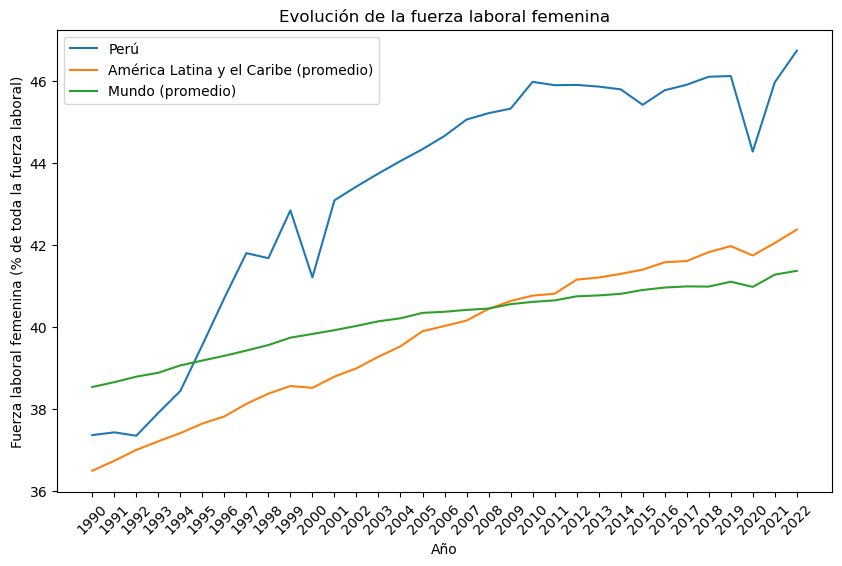

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(flf_total.index, flf_total['fl_peru'], label='Perú')
plt.plot(flf_total.index, flf_total['fl_lac'], label='América Latina y el Caribe (promedio)')
plt.plot(flf_total.index, flf_total['fl_world'], label='Mundo (promedio)')
plt.legend(loc='upper left')
plt.xticks(flf_total.index[30::], rotation=45)
plt.xlabel('Año')
plt.ylabel('Fuerza laboral femenina (% de toda la fuerza laboral)')
plt.title('Evolución de la fuerza laboral femenina')
plt.show()

## Emisiones de CO2 y crecimiento del PBI a nivel mundial

### 1. Limpieza de la base de datos

Primero, se filtra la base de datos para obtener solo las emisiones del CO2. También se reemplaza los valores missing con numpy para que sean float y poder pasar todos los valores de string a float.

In [47]:
co2 = pd.read_csv('desarrollo_global.csv')
co2 = co2.loc[((female_lf['Series Name'] == 'CO2 emissions (metric tons per capita)'))]
co2 = co2[co2.columns[~co2.columns.isin(['Country Name', 'Country Code', 'Series Name','Series Code'])]]
co2.columns = yrs
co2.replace('..', np.nan, inplace=True)
co2 = co2.astype(float)

co2

/var/folders/v5/719lrkzs4hj7f4f4mwq95c1h0000gn/T/ipykernel_29917/2099638841.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  co2.replace('..', np.nan, inplace=True)


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.658469,3.811521,3.951961,3.833834,3.833681,3.924299,3.994402,3.718223,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.674233,6.445931,6.485769,6.465288,6.302098,6.594057,6.287204,5.777148,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.790532,0.802872,0.763984,0.754344,0.743930,0.740880,0.743359,0.660876,NaN,NaN
1574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.790174,0.802482,0.763559,0.753867,0.743461,0.740394,0.742893,0.660413,NaN,NaN
1580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.790532,0.802872,0.763984,0.754344,0.743930,0.740880,0.743359,0.660876,NaN,NaN
1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.885588,5.857718,5.735859,5.687045,5.773008,5.947017,6.012487,5.923960,NaN,NaN


Para facilitar el merge, se calcula un promedio mundial para cada año, después de transponer la base de datos anterior.

In [51]:
co2 = co2.transpose()

co2['co2'] = co2.mean(axis=1)

co2 = co2[co2.columns[co2.columns.isin(['co2'])]]
co2

,co2
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN
...,...
2018,4.102909
2019,4.044442
2020,3.767934
2021,NaN


Se repite el mismo proceso para el crecimiento del PBI.

In [54]:
gdp = pd.read_csv('desarrollo_global.csv')
gdp = gdp.loc[((female_lf['Series Name'] == 'GDP growth (annual %)'))]
gdp = gdp[gdp.columns[~gdp.columns.isin(['Country Name', 'Country Code', 'Series Name','Series Code'])]]
gdp.columns = yrs
gdp.replace('..', np.nan, inplace=True)
gdp = gdp.astype(float)
gdp

/var/folders/v5/719lrkzs4hj7f4f4mwq95c1h0000gn/T/ipykernel_29917/2194812490.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gdp.replace('..', np.nan, inplace=True)


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.002018,1.774449,2.218726,3.314981,3.802599,4.019346,2.087712,-3.302082,8.908528,4.856402
15,NaN,-13.605441,-19.685042,34.313729,5.839413,6.206898,-4.804971,9.452963,10.796239,8.433280,...,2.800000,3.800000,3.700000,3.200000,1.300000,1.200000,1.000000,-5.100000,3.400000,3.200002
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.500000,1.762821,3.149606,-1.679389,-6.987578,2.671119,-0.487805,4.411765,-0.782473,1.735016
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548,-11.183940,8.287200,8.809579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,NaN,0.977380,6.048576,6.100847,4.956462,4.773029,1.357426,-1.225410,2.976491,9.375582,...,5.058056,4.866911,2.896515,1.280172,2.444259,2.646421,2.559391,-1.961830,4.153095,3.585452
1575,NaN,0.980916,6.047241,6.098513,4.955884,4.776562,1.350254,-1.226522,2.973521,9.381936,...,5.061283,4.867565,2.895466,1.277042,2.443968,2.645517,2.557396,-1.956754,4.152040,3.580911
1581,NaN,0.977380,6.048576,6.100847,4.956462,4.773029,1.357426,-1.225410,2.976491,9.375582,...,5.058056,4.866911,2.896515,1.280172,2.444259,2.646421,2.559391,-1.961830,4.153095,3.585452
1587,NaN,0.176220,3.253635,3.580183,8.505536,6.889678,6.027227,3.166519,5.828765,7.673989,...,5.531851,4.705957,4.294246,4.215761,5.205582,4.938959,4.122023,-0.683348,7.584939,3.123288


In [56]:
gdp = gdp.transpose()

gdp['gdp'] = gdp.mean(axis=1)

gdp = gdp[gdp.columns[gdp.columns.isin(['gdp'])]]
gdp

,gdp
1960,NaN
1961,3.308166
1962,5.048257
1963,4.947116
1964,6.234636
...,...
2018,3.072767
2019,2.797521
2020,-4.790939
2021,5.446574


### 2. Merge del los datos obtenidos

In [60]:
co2_gdp = co2.merge(gdp, left_index=True, right_index=True)

co2_gdp

,co2,gdp
1960,NaN,NaN
1961,NaN,3.308166
1962,NaN,5.048257
1963,NaN,4.947116
1964,NaN,6.234636
...,...,...
2018,4.102909,3.072767
2019,4.044442,2.797521
2020,3.767934,-4.790939
2021,NaN,5.446574


### 3. Elaboración del scatter plot para visualizar la relación entre crecimiento del PBI y emisión de CO2

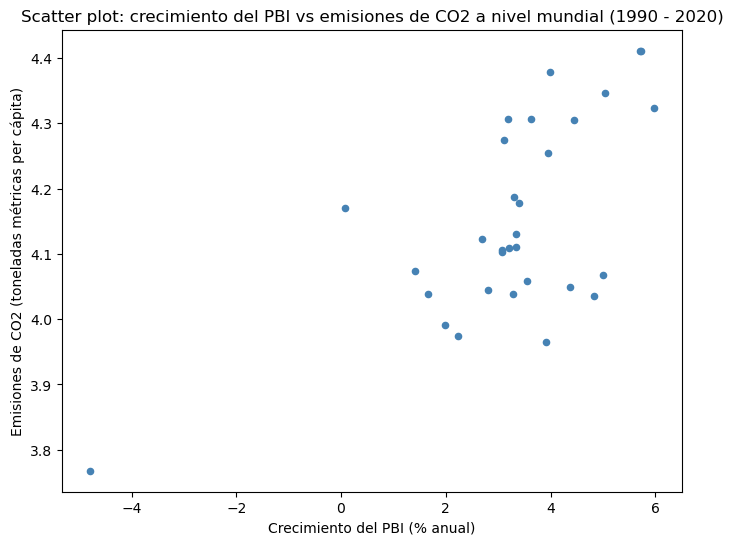

In [63]:
co2_gdp.plot(kind='scatter', x='gdp', y='co2', figsize=(8, 6), color='steelblue')

plt.title('Scatter plot: crecimiento del PBI vs emisiones de CO2 a nivel mundial (1990 - 2020)')
plt.ylabel('Emisiones de CO2 (toneladas métricas per cápita)')
plt.xlabel('Crecimiento del PBI (% anual)')

    
plt.show()
